In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("farmer.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.value_counts()
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [4]:
group = df.groupby('label')
group[['N']].mean()


,N
label,
apple,20.80
banana,100.23
blackgram,40.02
chickpea,40.09
coconut,21.98
coffee,101.20
cotton,117.77
grapes,23.18
jute,78.40


In [5]:
# Calculating mean, min, and max all together
result = group[['temperature']].agg(['mean', 'min', 'max'])
result

temperature                      
                   mean        min        max
label                                        
apple         22.630942  21.036527  23.996862
banana        27.376798  25.010185  29.908885
blackgram     29.973340  25.097374  34.946616
chickpea      18.872847  17.024985  20.995022
coconut       27.409892  25.008724  29.869083
coffee        25.540477  23.059519  27.923744
cotton        23.988958  22.000851  25.992374
grapes        23.849575   8.825675  41.948657
jute          24.958376  23.094338  26.985822
kidneybeans   20.115085  15.330426  24.923601
lentil        24.509052  18.064861  29.944139
maize         22.389204  18.041855  26.549864
mango         31.208770  27.003155  35.990097
mothbeans     28.194920  24.018254  31.999286
mungbean      28.525775  27.014704  29.914544
muskmelon     28.663066  27.024151  29.943492
orange        22.765725  10.010813  34.906653
papaya        33.723859  23.012402  43.675493
pigeonpeas    27.741762  18.319104  36.977944
pomegranate   21.837842  18.071330  24.962732
rice          23.689332  20.045414  26.929951
watermelon    25.591767  24.043558  26.986037

In [6]:
result.index

Index(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize', 'mango',
       'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya', 'pigeonpeas',
       'pomegranate', 'rice', 'watermelon'],
      dtype='object', name='label')

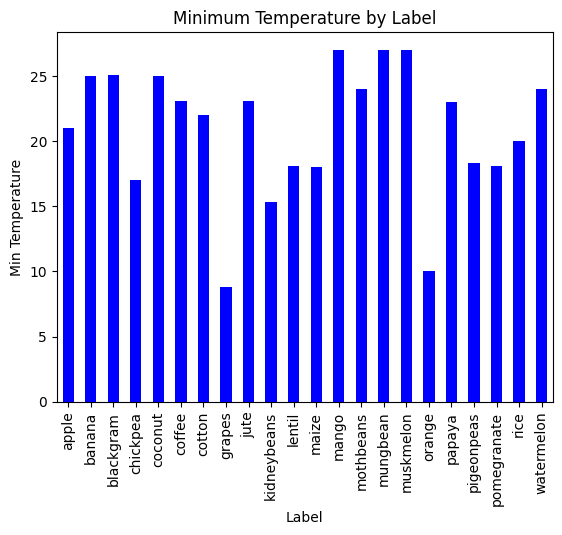

In [7]:
min_temperature = group['temperature'].min()
min_temperature.plot.bar(color='blue')

plt.xlabel('Label')
plt.ylabel('Min Temperature')
plt.title('Minimum Temperature by Label')

plt.show()

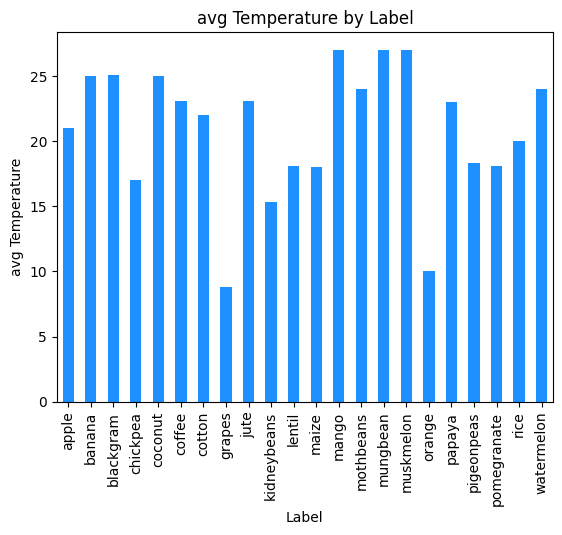

<Axes: xlabel='label'>

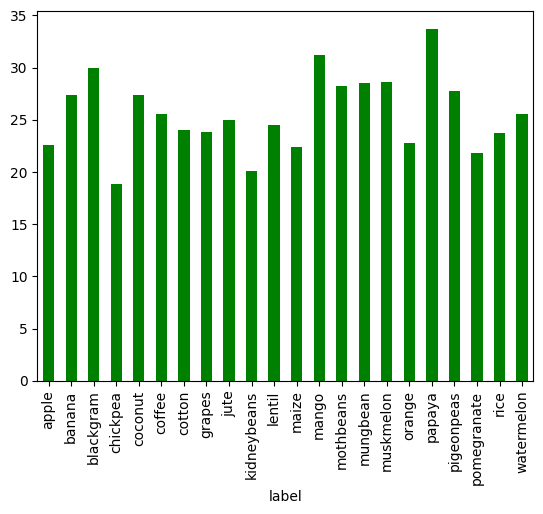

In [8]:
min_temperature = group['temperature'].min()
min_temperature.plot.bar(color='dodgerblue')

plt.xlabel('Label')
plt.ylabel('avg Temperature')
plt.title('avg Temperature by Label')

plt.show()
mean_temperature = group['temperature'].mean()
mean_temperature.plot.bar(color='green')

In [9]:
nitro = group['N'].agg(min_nitro='min',max_nitro='max',avg_nitro='mean')

In [10]:
nitro.index

Index(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize', 'mango',
       'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya', 'pigeonpeas',
       'pomegranate', 'rice', 'watermelon'],
      dtype='object', name='label')

In [11]:
nitro.reset_index(inplace=True)

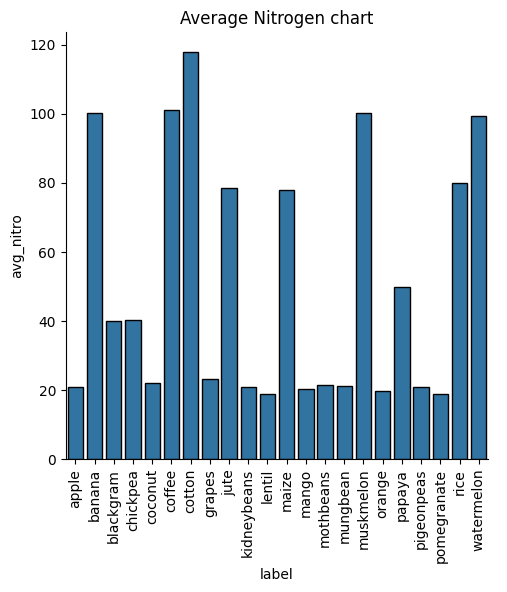

In [12]:
sns.catplot(x='label',y='avg_nitro',data=nitro,kind='bar',ec='k')
plt.title("Average Nitrogen chart")
plt.xticks(rotation=90)
plt.show()

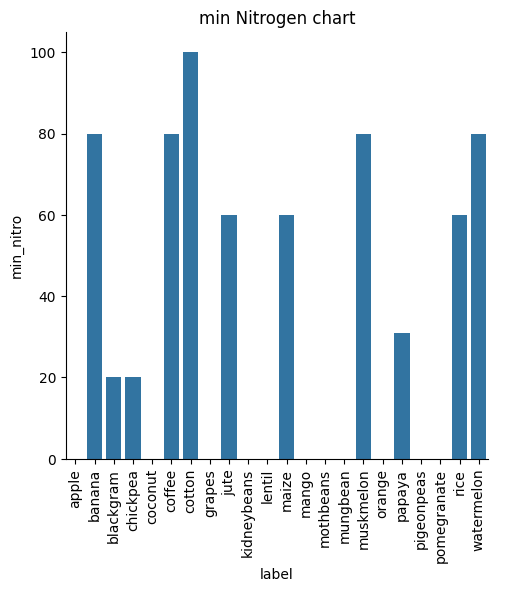

In [13]:
sns.catplot(x='label',y='min_nitro',data=nitro,kind='bar')
plt.title("min Nitrogen chart")
plt.xticks(rotation=90)
plt.show()

In [14]:
x = df.drop('label',axis = 'columns')
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [15]:
x.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [17]:
x.duplicated().sum()

0

In [18]:
x.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
dtype: object

<Axes: xlabel='temperature', ylabel='Density'>

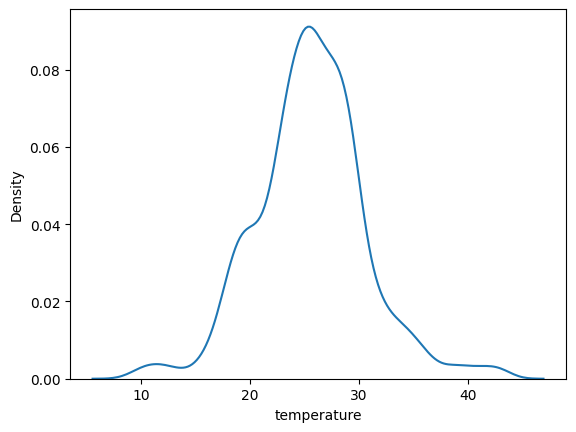

In [19]:
sns.kdeplot(x['temperature'])

In [20]:
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [21]:
from sklearn.preprocessing import StandardScaler    


In [22]:
std_scaler = StandardScaler()  
x_transformed = std_scaler.fit_transform(x)


In [23]:
x_transformed.shape 

(2200, 7)

In [24]:
x.shape

(2200, 7)

In [25]:
pd.DataFrame(x_transformed)

,0,1,2,3,4,5,6
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373
...,...,...,...,...,...,...,...
2195,1.529390,-0.587134,-0.318922,0.228814,-0.227709,0.401395,1.352437
2196,1.312641,-1.163269,-0.417666,0.355720,-0.666947,-0.494413,0.445183
2197,1.827421,-0.617457,-0.358420,-0.293218,-0.191235,-0.138120,1.271418
2198,1.800327,-0.647780,-0.279425,0.129612,-0.869518,0.373904,0.431545


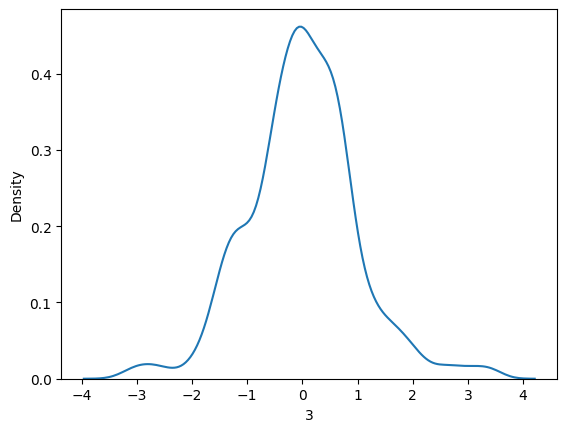

In [26]:
sns.kdeplot(pd.DataFrame(x_transformed)[3])
plt.show()

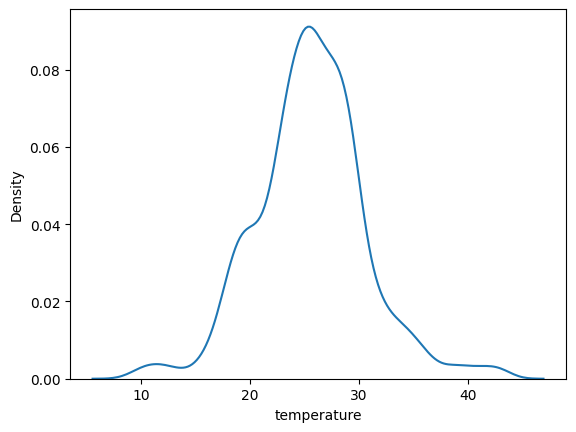

In [27]:
sns.kdeplot(x['temperature'])
plt.show()

In [28]:
### ready to train the algorithm 
from sklearn.cluster import KMeans

In [29]:
kmeans_obj = KMeans()


In [30]:
labels = kmeans_obj.fit_predict(x_transformed)  # algorithm trained and prediction 


In [31]:
set(labels)

{0, 1, 2, 3, 4, 5, 6, 7}

In [32]:
labels

array([0, 0, 0, ..., 0, 1, 1])

In [33]:
labels.shape

(2200,)

In [34]:
x_transformed.shape

(2200, 7)

In [35]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [36]:
df['cluster_no'] = labels

In [37]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,cluster_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,0


In [38]:
df[df['cluster_no']  ==  6]['label'].unique()

array(['chickpea', 'kidneybeans', 'pigeonpeas', 'lentil'], dtype=object)

In [39]:
df[df['cluster_no']  ==  7]['label'].unique()

array(['pigeonpeas', 'pomegranate', 'orange', 'papaya', 'coconut'],
      dtype=object)

In [40]:
import os,joblib
os.makedirs('models',exist_ok=True)
joblib.dump(std_scaler,'./models/std_scaler.lb')
joblib.dump(kmeans_obj,'./models/kmeans_model.lb')


['./models/kmeans_model.lb']

In [41]:
df[['label','cluster_no']].to_csv('./models/filter_crops.csv',index=False)